# **Import library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# **Upload Dataset**

In [3]:
from google.colab import files

# Upload file CSV
uploaded = files.upload()

# Membaca dataset
df = pd.read_csv("tokobangunan_utss.csv")

Saving tokobangunan_utss.csv to tokobangunan_utss.csv


# **Load dataset tokobangunan_utss.csv**


In [4]:
df = pd.read_csv('tokobangunan_utss.csv')
df.head()

,ID Transaksi,Produk,Kategori,Satuan,Kuantitas,Harga Satuan,Total Harga,Tanggal Pembelian
0,T001,Semen,Material Konstruksi,Zak,5,63000,315000,1/1/2024
1,T001,Pasir,Material Konstruksi,Meter Kubik,5,447000,2235000,1/1/2024
2,T001,Cat Tembok,Cat,Kaleng,8,232000,1856000,1/1/2024
3,T002,Semen,Material Konstruksi,Zak,10,63000,630000,1/2/2024
4,T002,Besi Beton,Bahan Logam dan PVC,Batang,1,101000,101000,1/2/2024


# **Melihat Data**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID Transaksi       90 non-null     object
 1   Produk             90 non-null     object
 2   Kategori           90 non-null     object
 3   Satuan             90 non-null     object
 4   Kuantitas          90 non-null     int64 
 5   Harga Satuan       90 non-null     int64 
 6   Total Harga        90 non-null     int64 
 7   Tanggal Pembelian  90 non-null     object
dtypes: int64(3), object(5)
memory usage: 5.8+ KB


# **Persiapan Fitur dan Label**

Saya mengambil Total Harga untuk diprediksi berdasarkan Kuantitas, dan Harga Satuannya

In [8]:
X = df[['Kuantitas', 'Harga Satuan']]
y = df['Total Harga']

# **Split data training dan testing**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Latih model regresi linear**

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# **Prediksi hasil dari data testing**

In [11]:
y_pred = model.predict(X_test)

# **Evaluasi model**

In [12]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 49109083409.79
R² Score: 0.63


1. MSE = 491,090,083,409.79 Nilai MSE besar menunjukkan ada selisih cukup jauh antara prediksi dan nilai asli.

2. Dengan R² = 0.63 model cukup baik, tapi masih bisa ditingkatkan.

# **Visualisasi Hasil Prediksi dan Nilai Sebenarnya**

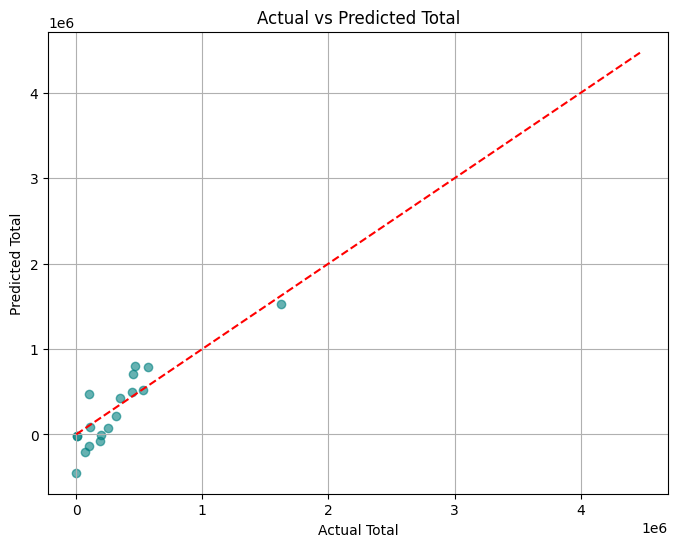

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Garis ideal prediksi
plt.xlabel("Actual Total")
plt.ylabel("Predicted Total")
plt.title("Actual vs Predicted Total")
plt.grid(True)
plt.show()

# **Koefisien dari model**

In [14]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Kuantitas,143857.286947
Harga Satuan,6.042272


1. Kuantitas (148,857.29) Jika Kuantitas bertambah 1 unit, maka nilai prediksi akan bertambah sekitar 148,857.29, dengan asumsi variabel lain tetap.

2. Harga Satuan (6,04) Jika Harga Satuan naik 1 unit, maka nilai prediksi akan naik sekitar 6.04, dengan asumsi variabel lain tetap.

Kesimpulan: Model menunjukkan bahwa kuantitas pembelian jauh lebih berpengaruh terhadap total nilai prediksi dibandingkan harga satuan. Ini bisa terjadi jika model memprediksi total harga atau nilai penjualan, di mana kuantitas berperan besar.
